In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style("white")

# Supress aannoying harmless error.
warnings.filterwarnings(
    action = "ignore",
    module = "scipy",
    message = "^internal gelsd"
)

# Dimensionality Reduction in Linear Regression

1. The more features in your regression model, the longer it takes to run
2. Variance in the features unrelated to outcome y may create noise
3. More features = more unrelated variance and more noise
4. Meaning that we should reduce the dimensions / features
5. This is similar to PCA, but not

The difference is that with PCA, we reduce X into a smaller set R(X) that contains the variance in X
With dimensionality reduction, we want to reduce a set of X into R(X) that contains all the variance in X and Y (inner join)

# Partial Least Squares Regression

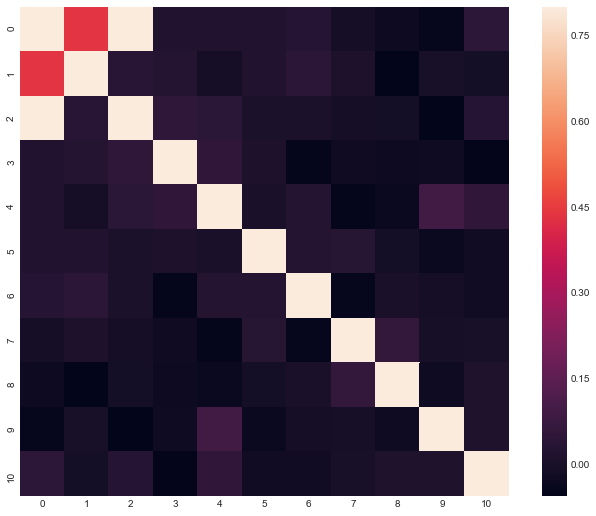

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n*p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.849574099380926
R-squared PLSR: 0.8495738816736931


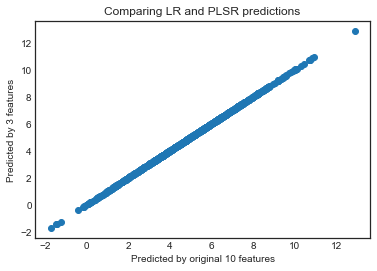

In [5]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

# Drill

In [13]:
def regressionmodel(components):
    # Fit a linear model with all 10 features.
    regr = linear_model.LinearRegression()
    regr.fit(X, y)

    # Save predicted values.
    Y_pred = regr.predict(X)
    print('R-squared regression:', regr.score(X, y))

    # Fit a linear model using Partial Least Squares Regression.
    # Reduce feature space to 3 dimensions.
    pls1 = PLSRegression(n_components=components)

    # Reduce X to R(X) and regress on y.
    pls1.fit(X, y)

    # Save predicted values.
    Y_PLS_pred = pls1.predict(X)
    print('R-squared PLSR:', pls1.score(X, y))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 10 features')
    plt.ylabel('Predicted by {} features'.format(components))
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

R-squared regression: 0.849574099380926
R-squared PLSR: 0.842363738365725


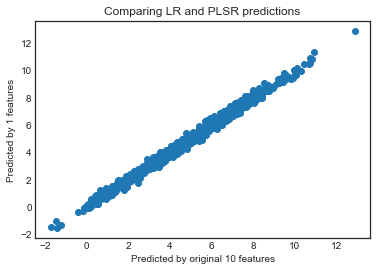

In [14]:
regressionmodel(1)

R-squared regression: 0.849574099380926
R-squared PLSR: 0.8495740993720855


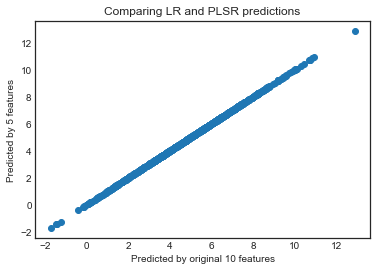

In [16]:
regressionmodel(5)

R-squared regression: 0.9648195521070301
R-squared PLSR: 0.9558967942540296


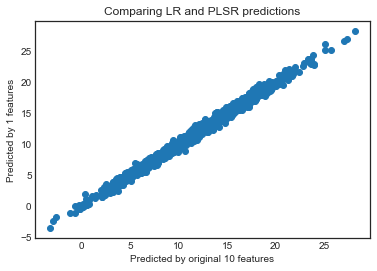

In [22]:
# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 5 * X[:, 1] + np.random.normal(size=n * 1) + 12
regressionmodel(1)